# SHAP Tutorial

课程部分：
- SHAP 值
- SHAP 聚合
    - Force plots
    - Mean SHAP
    - Beeswarm
    - Violin
    - Heatmap
    - Dependence
- 自定义 SHAP 图
- 二元和分类目标变量
- SHAP 交互值
- 分类特征

Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone


In [76]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

import os
dp = os.environ.get('pub_data')

## Dataset

In [24]:
# import dataset
df = pd.read_csv(dp + 
    'Abalone dataset/abalone.data',
    names=[
        'sex',
        'length',
        'diameter',
        'height',
        'whole weight',
        'shucked weight',
        'viscera weight',
        'shell weight',
        'rings',
    ],
)

print(len(data))
df.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(0.5, 0, 'whole weight')

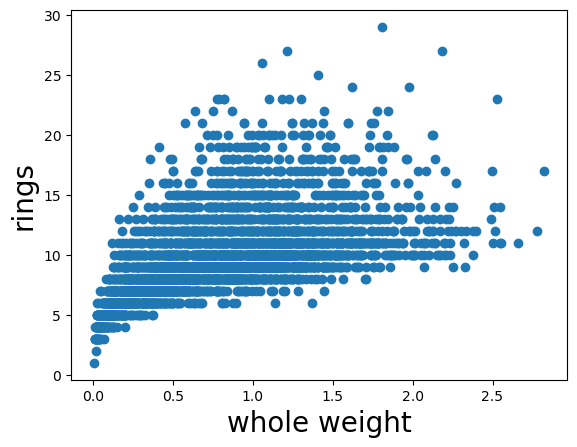

In [18]:
# plot 1: whole weight
plt.scatter(df["whole weight"], df["rings"])
plt.ylabel("rings", size=20)
plt.xlabel("whole weight", size=20)

Text(0.5, 0, 'sex')

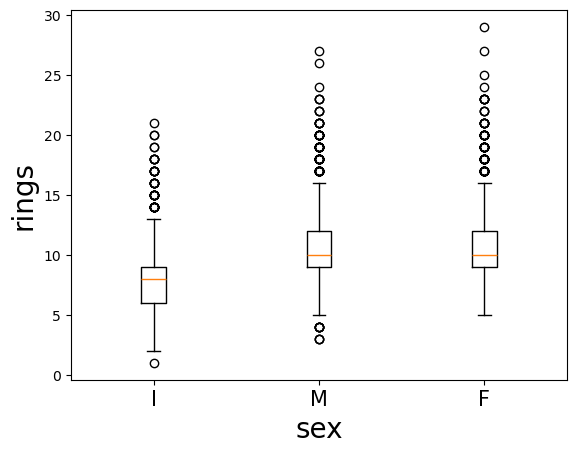

In [13]:
# plot 2: sex
plt.boxplot(data[data.sex == "I"]["rings"], positions=[1])
plt.boxplot(data[data.sex == "M"]["rings"], positions=[2])
plt.boxplot(data[data.sex == "F"]["rings"], positions=[3])

plt.xticks(ticks=[1, 2, 3], labels=["I", "M", "F"], size=15)
plt.ylabel("rings", size=20)
plt.xlabel("sex", size=20)

<Axes: >

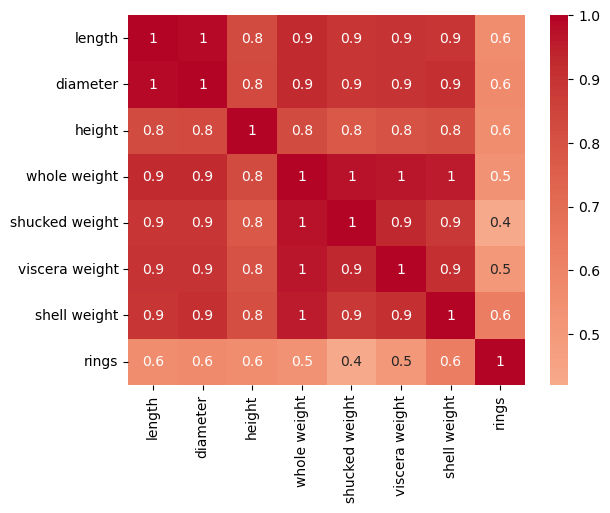

In [19]:
# plot 3: Correlation heatmap
cont = [
    "length",
    "diameter",
    "height",
    "whole weight",
    "shucked weight",
    "viscera weight",
    "shell weight",
    "rings",
]
corr_matrix = pd.DataFrame(df[cont], columns=cont).corr()

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".1g")

## Feature Engineering

In [25]:
y = df["rings"]
X = df[["sex", "length", "height", "shucked weight", "viscera weight", "shell weight"]]

In [26]:
# create dummy variables
y = y.copy()
X = X.copy()

X.loc[:, 'sex.M'] = X['sex'].apply(lambda s: 1 if s == 'M' else 0)
X.loc[:, 'sex.F'] = X['sex'].apply(lambda s: 1 if s == 'F' else 0)
X.loc[:, 'sex.I'] = X['sex'].apply(lambda s: 1 if s == 'I' else 0)
X = X.drop("sex", axis=1)

X.head()

,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


In [27]:
# train model
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Text(0.5, 0, 'Actual')

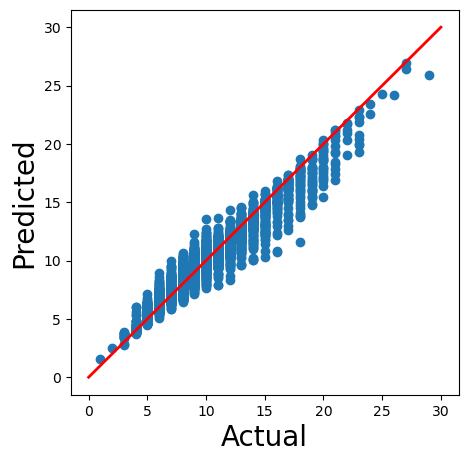

In [28]:
# get predictions
y_pred = model.predict(X)

# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot([0, 30], [0, 30], color="r", linestyle="-", linewidth=2)

plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)

## 1. Standard SHAP values


In [29]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# shap_values = explainer(X[0:100])

In [30]:
np.shape(shap_values.values)

(4177, 8)

### Waterfall plot


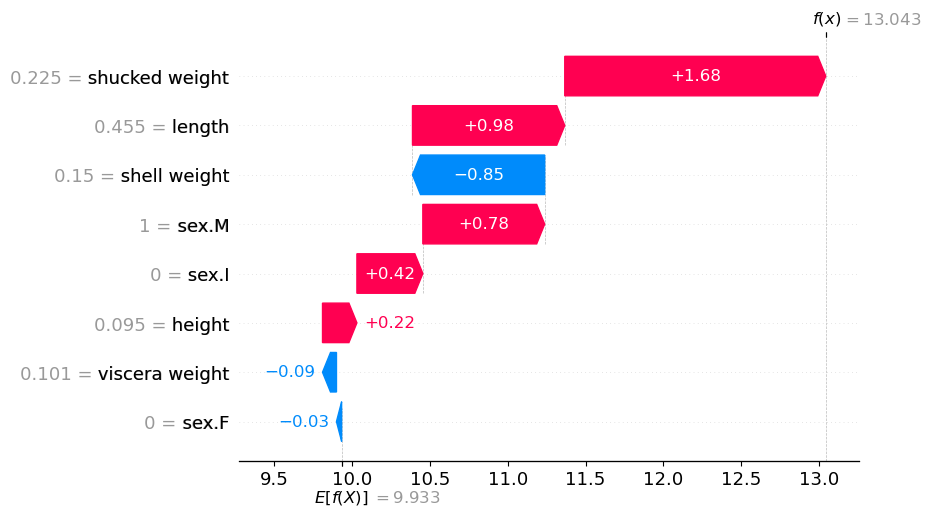

In [31]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

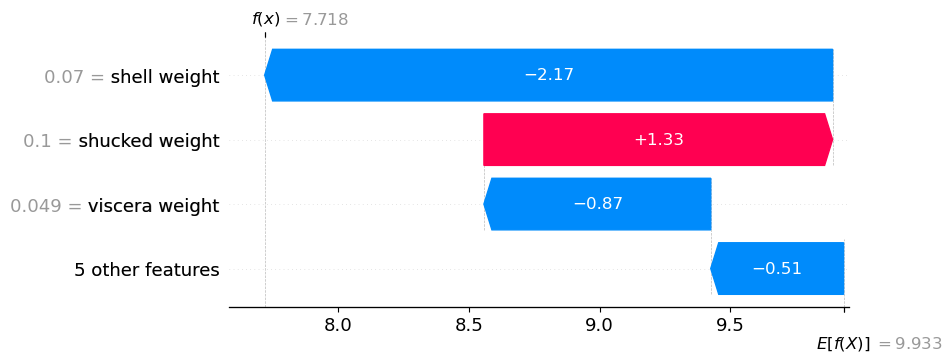

In [32]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[1], max_display=4)

## 2. SHAP aggregations

Note: from here on we only consider the continous target variable

### Force plot


In [77]:
# force plot
shap.plots.force(shap_values[0])

In [34]:
# stacked force plot
shap.plots.force(shap_values[0:100])

### Absolute Mean SHAP

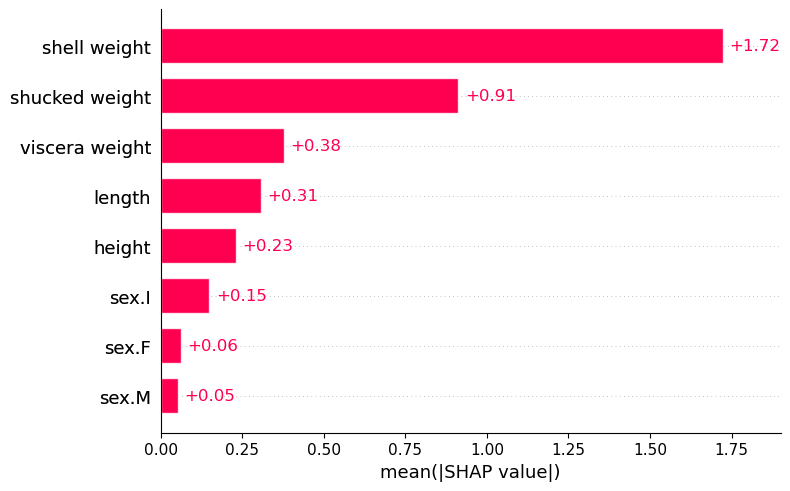

In [35]:
# mean SHAP
shap.plots.bar(shap_values)

### Beeswarm plot


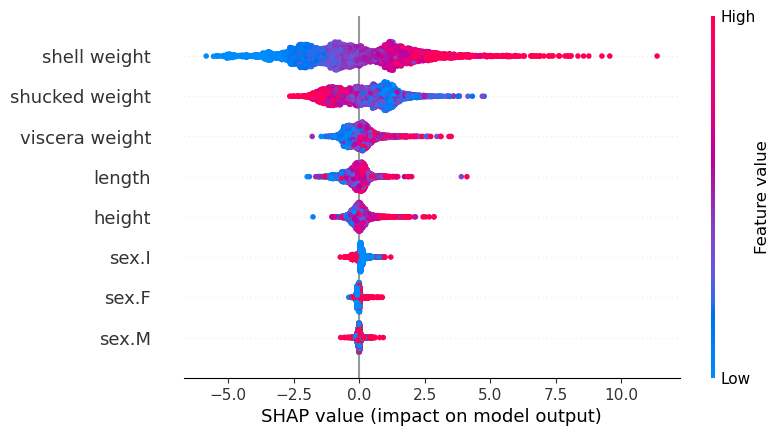

In [36]:
# beeswarm plot
shap.plots.beeswarm(shap_values)

### Violin plot


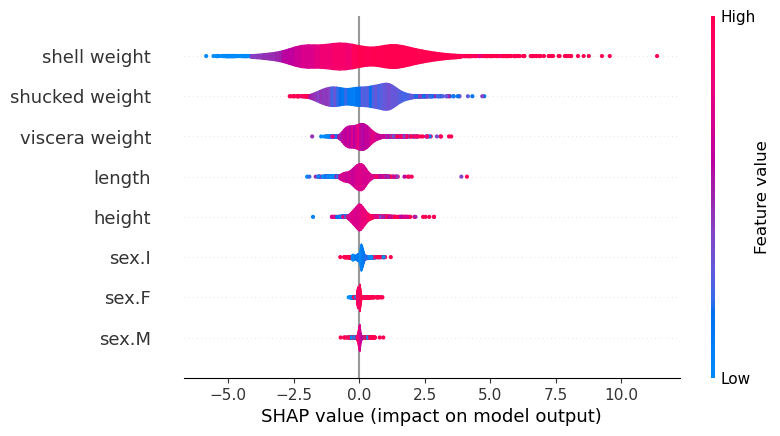

In [37]:
# violin plot
shap.plots.violin(shap_values)

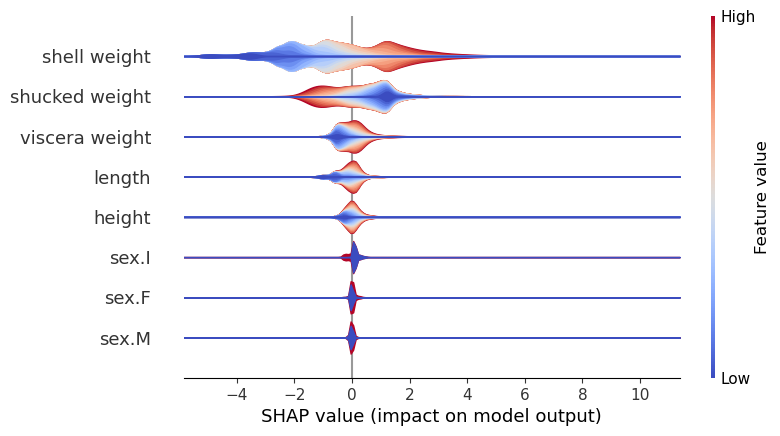

In [38]:
# layered violin plot
shap.plots.violin(shap_values, plot_type="layered_violin")

### Heamap

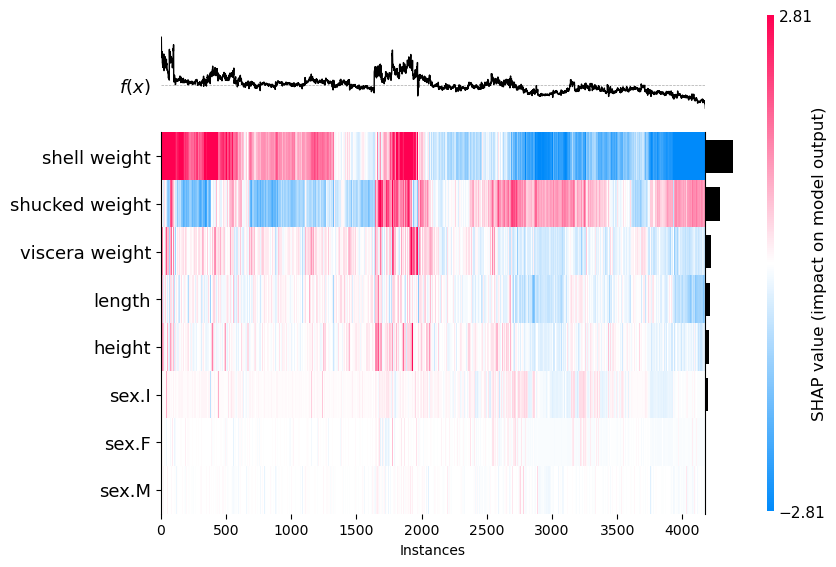

<Axes: xlabel='Instances'>

In [39]:
# heatmap
shap.plots.heatmap(shap_values)

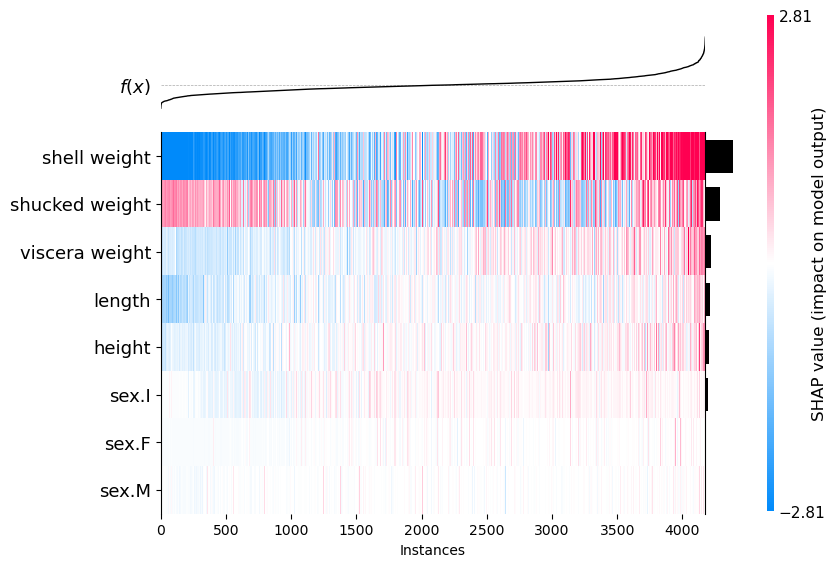

<Axes: xlabel='Instances'>

In [40]:
# order by predictions
order = np.argsort(y_pred)
shap.plots.heatmap(shap_values, instance_order=order)

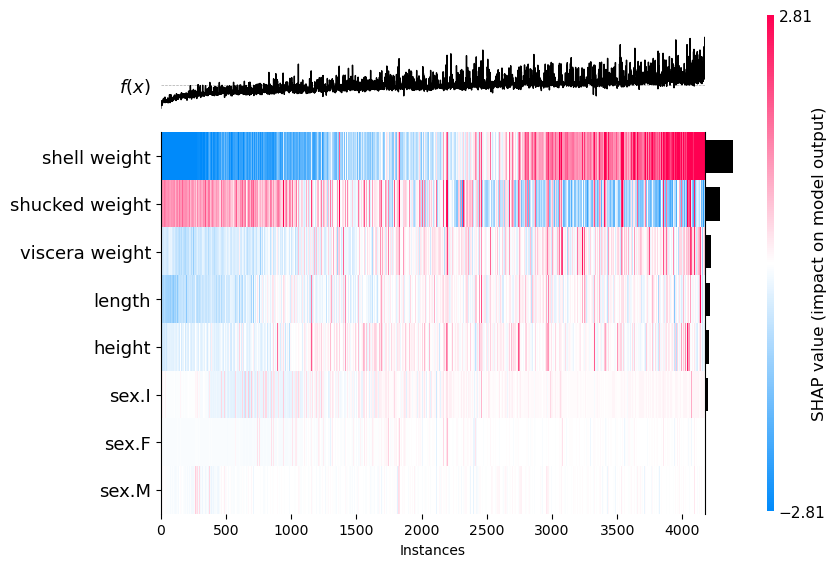

<Axes: xlabel='Instances'>

In [41]:
# order by shell weight value
order = np.argsort(data["shell weight"])
shap.plots.heatmap(shap_values, instance_order=order)

### Dependence plots


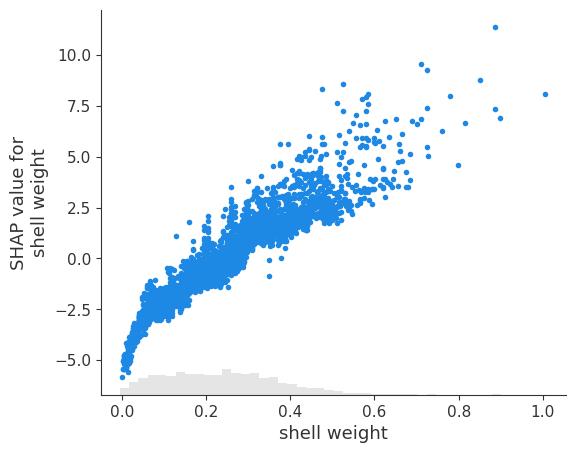

In [42]:
# plot 1: shell weight
shap.plots.scatter(shap_values[:, "shell weight"])

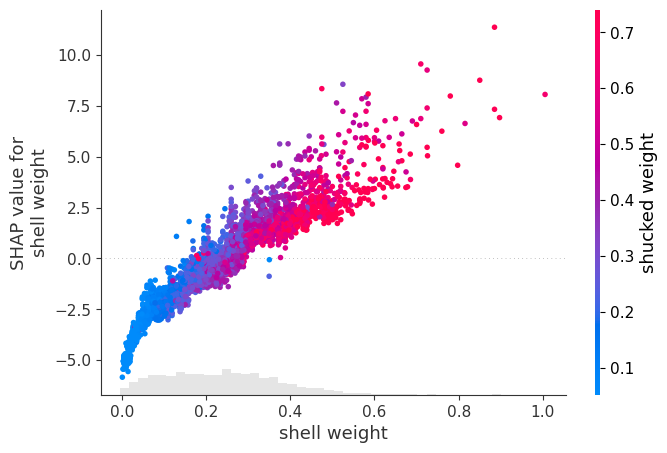

In [43]:
shap.plots.scatter(
    shap_values[:, "shell weight"], color=shap_values[:, "shucked weight"]
)

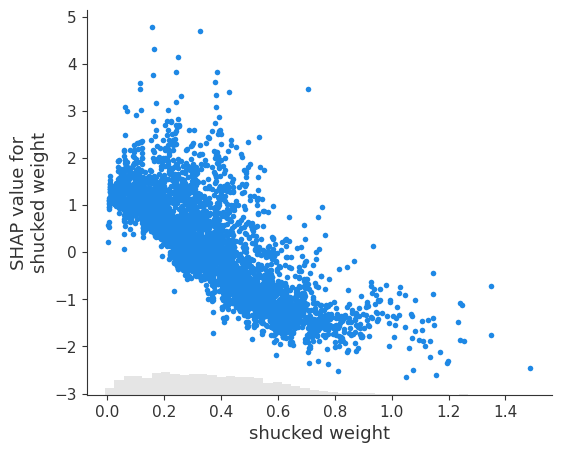

In [44]:
# plot 2: shucked weight
shap.plots.scatter(shap_values[:, "shucked weight"])

## 3. Custom Plots

In [45]:
# output SHAP object
shap_values

.values =
array([[ 9.7818142e-01,  2.2102022e-01,  1.6767840e+00, ...,
         7.8285056e-01, -3.3044200e-02,  4.2346570e-01],
       [-7.5280762e-01, -1.2323786e-01,  1.3336794e+00, ...,
        -5.4065891e-02, -7.0499517e-02,  4.9261141e-01],
       [-3.3046424e-01,  6.5754451e-02,  4.9781185e-01, ...,
         5.7943143e-02,  1.6627842e-01,  2.8612539e-01],
       ...,
       [ 1.7652534e-01,  1.7058614e-01, -1.0987480e+00, ...,
        -1.2453687e-03,  1.4432433e-02,  5.3551301e-02],
       [ 1.0700062e-01,  2.2240385e-01, -9.8834521e-01, ...,
         2.2371762e-02,  1.4795723e-02,  7.1517490e-02],
       [-8.6547263e-02,  1.7283893e-01, -9.0905148e-01, ...,
        -7.0653330e-03,  1.4564530e-02,  1.1492202e-01]], dtype=float32)

.base_values =
array([9.932759, 9.932759, 9.932759, ..., 9.932759, 9.932759, 9.932759],
      dtype=float32)

.data =
array([[0.455 , 0.095 , 0.2245, ..., 1.    , 0.    , 0.    ],
       [0.35  , 0.09  , 0.0995, ..., 1.    , 0.    , 0.    ],
       [0.5

In [46]:
np.shape(shap_values.values)

(4177, 8)

In [47]:
X.head()

,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


<Axes: >

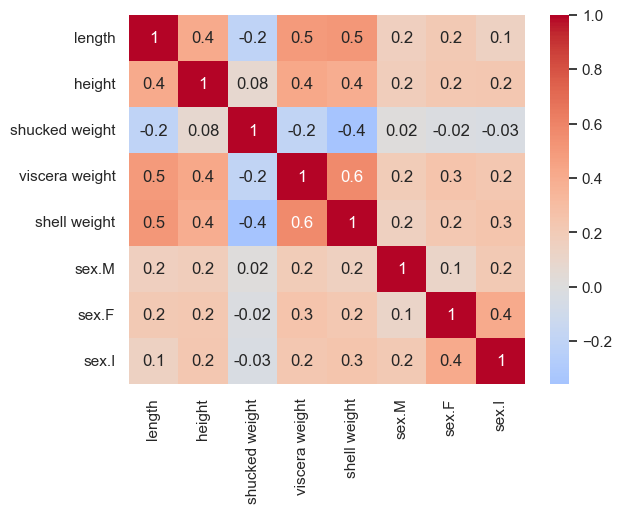

In [48]:
# SHAP correlation plot
corr_matrix = pd.DataFrame(shap_values.values, columns=X.columns).corr()

sns.set(font_scale=1)
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".1g")

## 4. Binary and categorical target variables


#### Binary target variable


In [49]:
# binary target varibale
y_bin = [1 if y_ > 10 else 0 for y_ in y]

# train model
model_bin = xgb.XGBClassifier(objective="binary:logistic")
model_bin.fit(X, y_bin)

# get shap values
explainer = shap.Explainer(model_bin)

shap_values_bin = explainer(X)

print(shap_values_bin.shape)

(4177, 8)


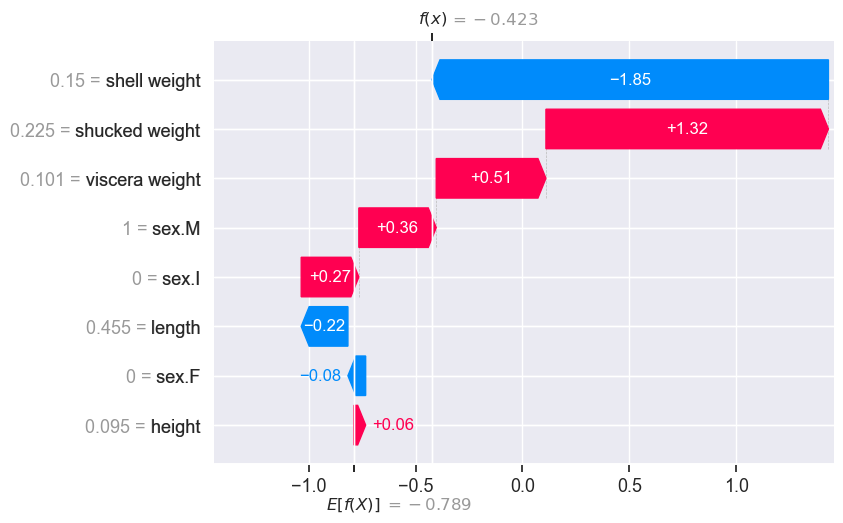

In [50]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values_bin[0])

In [51]:
# waterfall plot for first observation
shap.plots.force(shap_values_bin[0], link="logit")

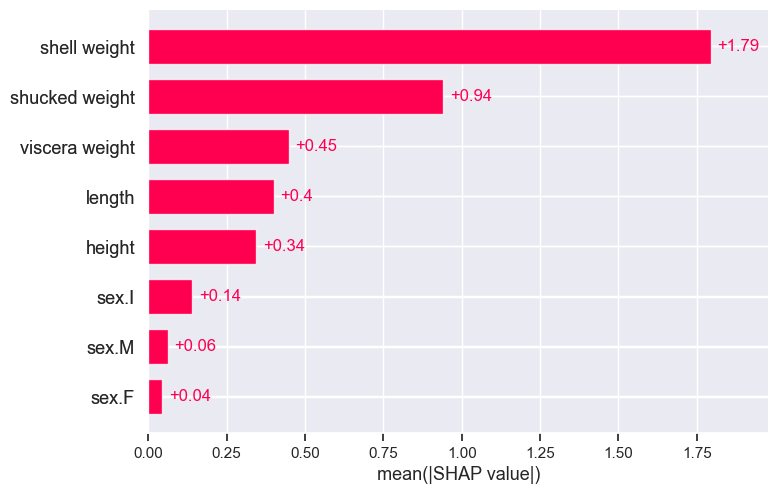

In [52]:
# waterfall plot for first observation
shap.plots.bar(shap_values_bin)

### Categorical target variables

In [53]:
# categorical target varibale
y_cat = [2 if y_ > 12 else 1 if y_ > 8 else 0 for y_ in y]

# train model
model_cat = xgb.XGBClassifier(objective="binary:logistic")
model_cat.fit(X, y_cat)

# get probability predictions
model_cat.predict_proba(X)[0]

array([0.25624034, 0.15713139, 0.5866283 ], dtype=float32)

In [54]:
# get shap values
explainer = shap.Explainer(model_cat)
shap_values_cat = explainer(X)

print(np.shape(shap_values_cat))

(4177, 8, 3)


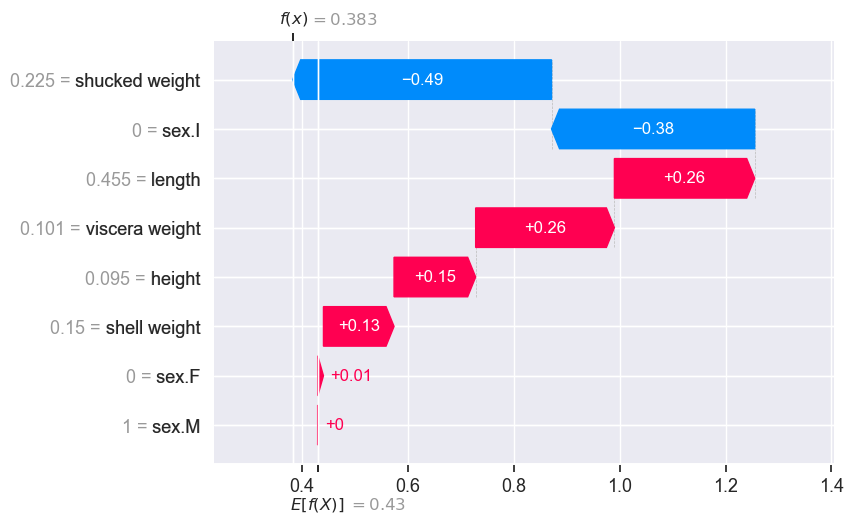

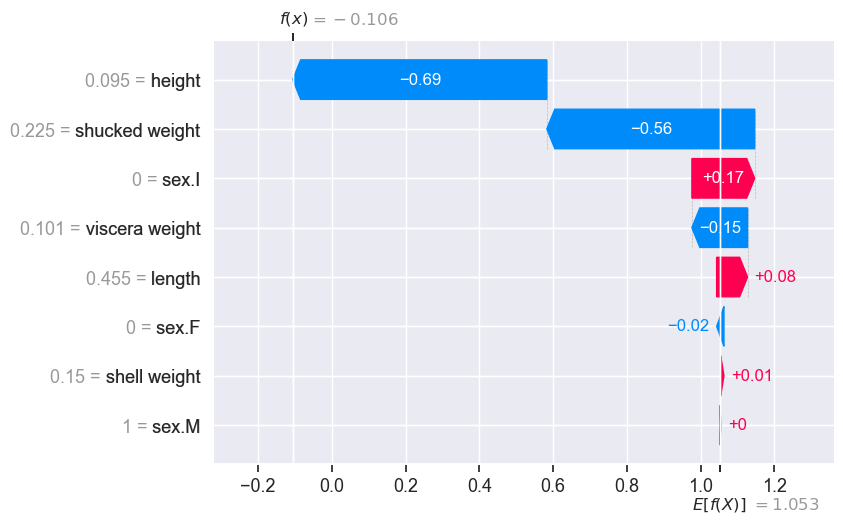

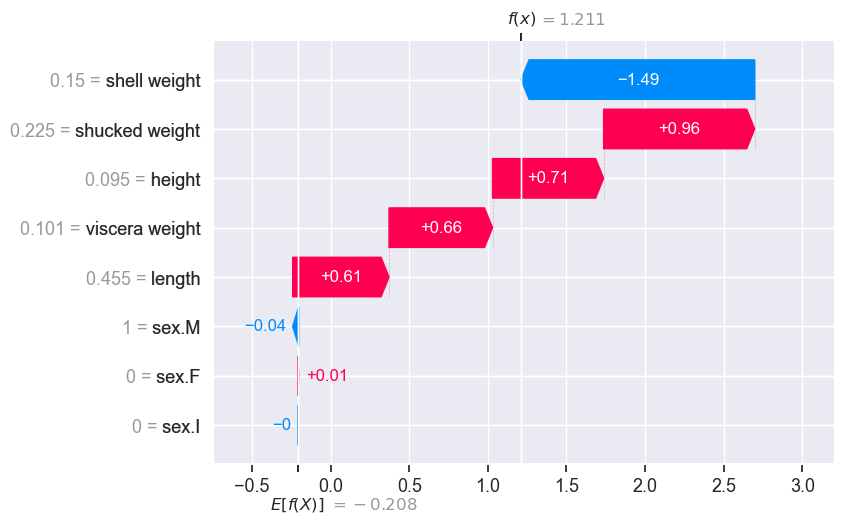

In [55]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values_cat[0, :, 0])

# waterfall plot for first observation
shap.plots.waterfall(shap_values_cat[0, :, 1])

# waterfall plot for first observation
shap.plots.waterfall(shap_values_cat[0, :, 2])

In [56]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)


# convert softmax to probability
x = [0.383, -0.106, 1.211]
softmax(x)

array([0.25628041, 0.15716122, 0.58655837])

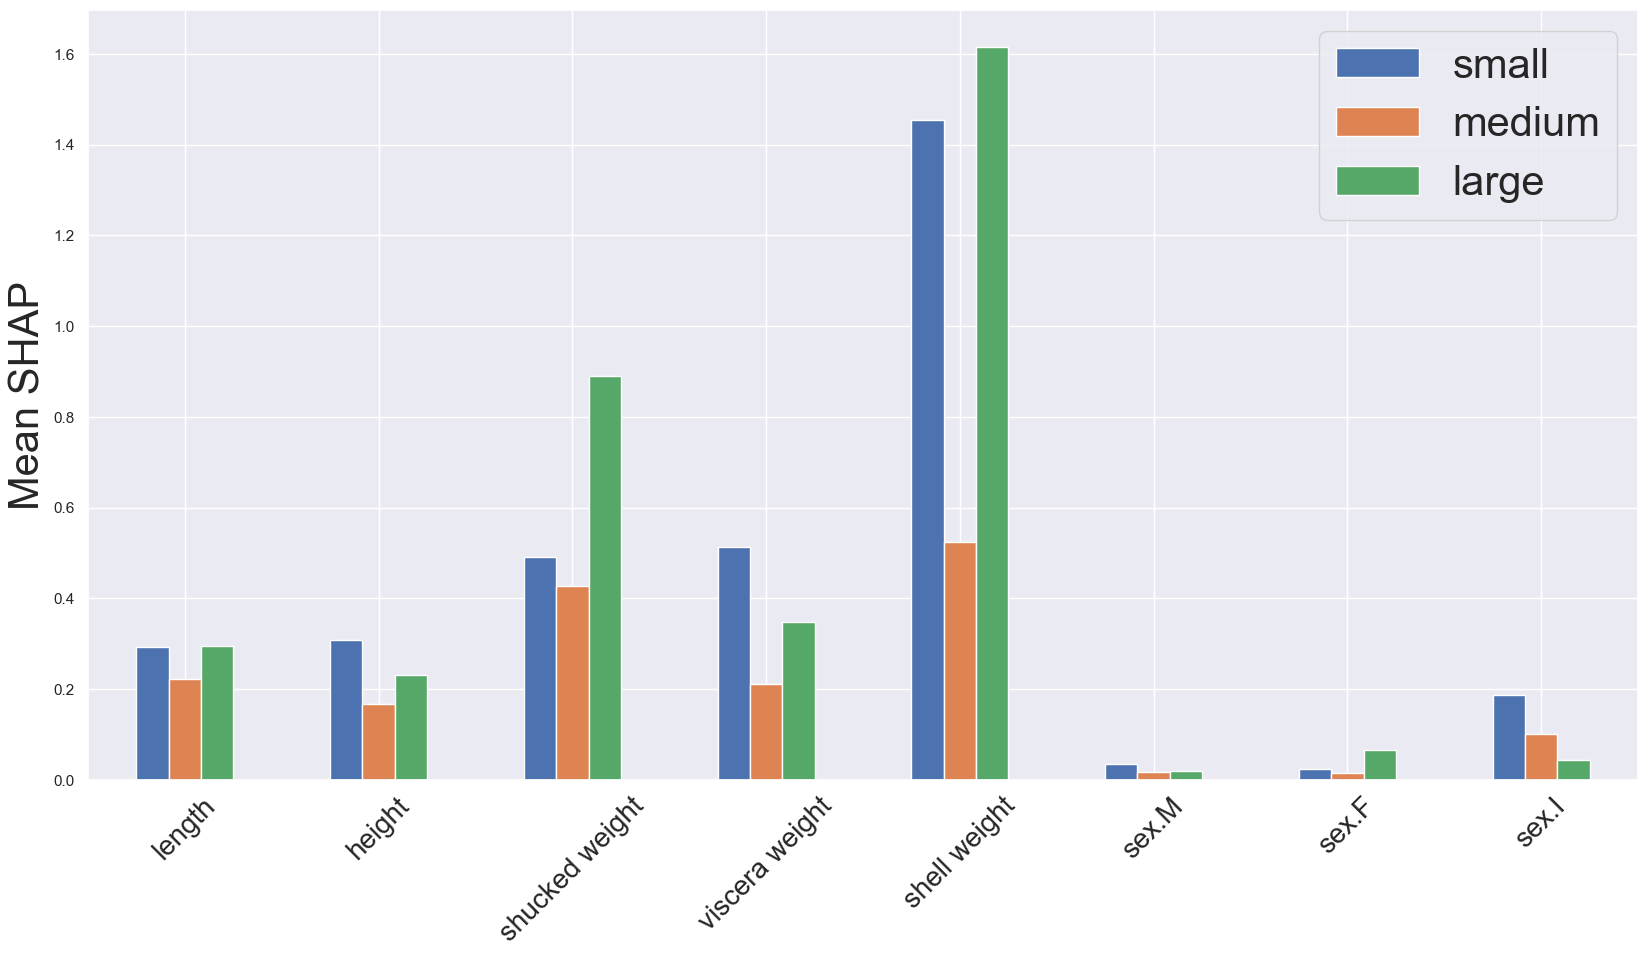

In [57]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:, :, 0]), axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:, :, 1]), axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:, :, 2]), axis=0)

df = pd.DataFrame({"small": mean_0, "medium": mean_1, "large": mean_2})

# plot mean SHAP values
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df.plot.bar(ax=ax)

ax.set_ylabel("Mean SHAP", size=30)
ax.set_xticklabels(X.columns, rotation=45, size=20)
ax.legend(fontsize=30)

In [58]:
# get model predictions
preds = model_cat.predict(X)

new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:, pred])

# replace shap values
shap_values_cat.values = np.array(new_shap_values)
print(shap_values_cat.shape)

(4177, 8)


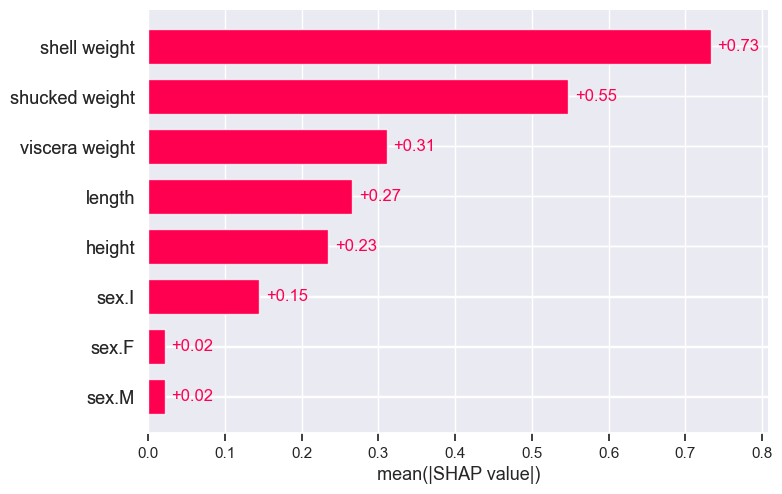

In [59]:
shap.plots.bar(shap_values_cat)

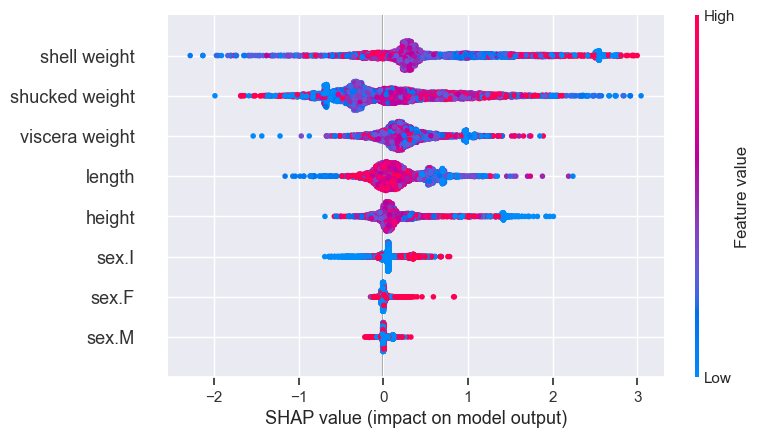

In [60]:
shap.plots.beeswarm(shap_values_cat)

## 5. SHAP interaction value


In [61]:
# get SHAP interaction values
explainer = shap.Explainer(model)
shap_interaction = explainer.shap_interaction_values(X)

In [62]:
# get shape of interaction values
np.shape(shap_interaction)

(4177, 8, 8)

In [63]:
# SHAP interaction values for first employee
shap_0 = np.round(shap_interaction[0], 2)
pd.DataFrame(shap_0, index=X.columns, columns=X.columns)

,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
length,-0.30,0.44,0.10,-0.18,0.59,0.27,0.04,0.02
height,0.44,-0.26,0.01,-0.09,-0.02,0.16,-0.01,-0.01
shucked weight,0.10,0.01,1.21,0.00,-0.16,0.45,-0.05,0.11
viscera weight,-0.18,-0.09,0.00,-0.20,0.28,0.06,-0.00,0.03
shell weight,0.59,-0.02,-0.16,0.28,-1.87,0.14,0.06,0.14
sex.M,0.27,0.16,0.45,0.06,0.14,-0.30,0.00,0.00
sex.F,0.04,-0.01,-0.05,-0.00,0.06,0.00,-0.07,0.00
sex.I,0.02,-0.01,0.11,0.03,0.14,0.00,0.00,0.13


### Mean SHAP interaction values


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'length'),
  Text(0, 1.5, 'height'),
  Text(0, 2.5, 'shucked weight'),
  Text(0, 3.5, 'viscera weight'),
  Text(0, 4.5, 'shell weight'),
  Text(0, 5.5, 'sex.M'),
  Text(0, 6.5, 'sex.F'),
  Text(0, 7.5, 'sex.I')])

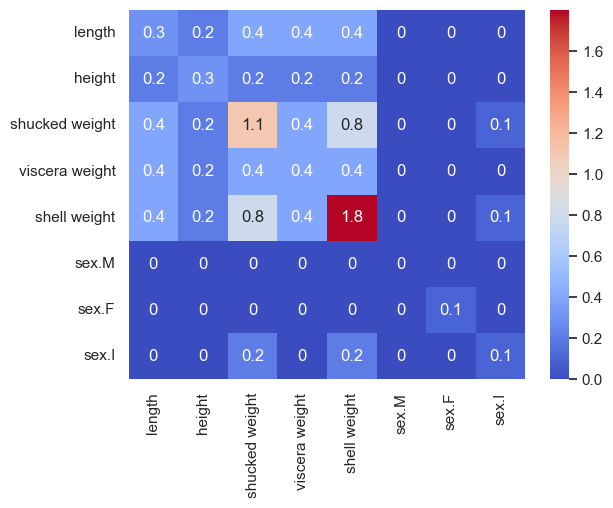

In [64]:
# get absolute mean of matrices
mean_shap = np.abs(shap_interaction).mean(0)
mean_shap = np.round(mean_shap, 1)

df = pd.DataFrame(mean_shap, index=X.columns, columns=X.columns)

# times off diagonal by 2
df.where(df.values == np.diagonal(df), df.values * 2, inplace=True)

# display
sns.set(font_scale=1)
sns.heatmap(df, cmap="coolwarm", annot=True)
plt.yticks(rotation=0)

### Dependence plot


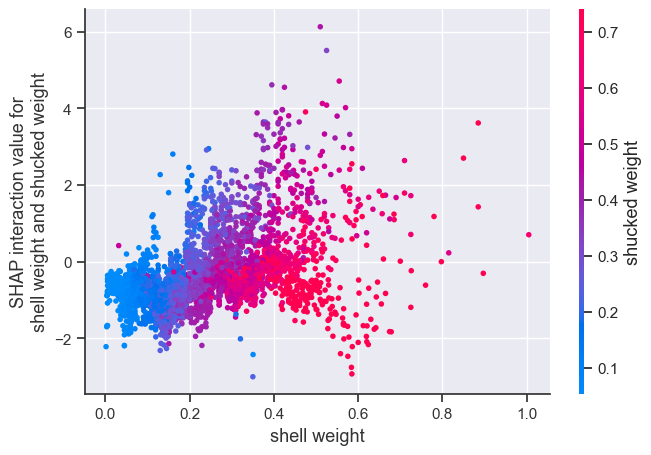

In [65]:
shap.dependence_plot(
    ("shell weight", "shucked weight"), shap_interaction, X, display_features=X
)

Text(0, 0.5, 'shell weight')

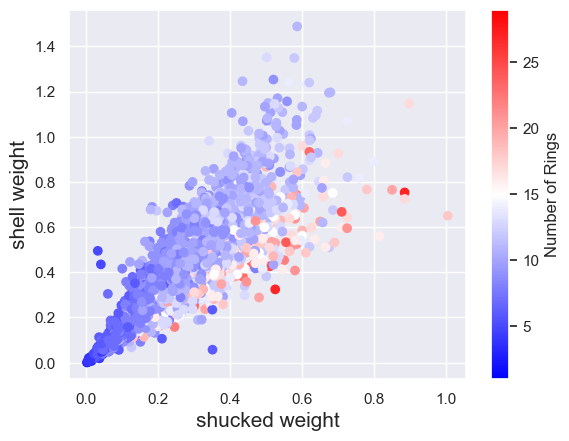

In [66]:
# interaction between shell weight and shucked weight
plt.scatter(data["shell weight"], data["shucked weight"], c=data["rings"], cmap="bwr")
plt.colorbar(label="Number of Rings", orientation="vertical")

plt.xlabel("shucked weight", size=15)
plt.ylabel("shell weight", size=15)

## 6. SHAP for categorical variables

In [67]:
X.head()

,length,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


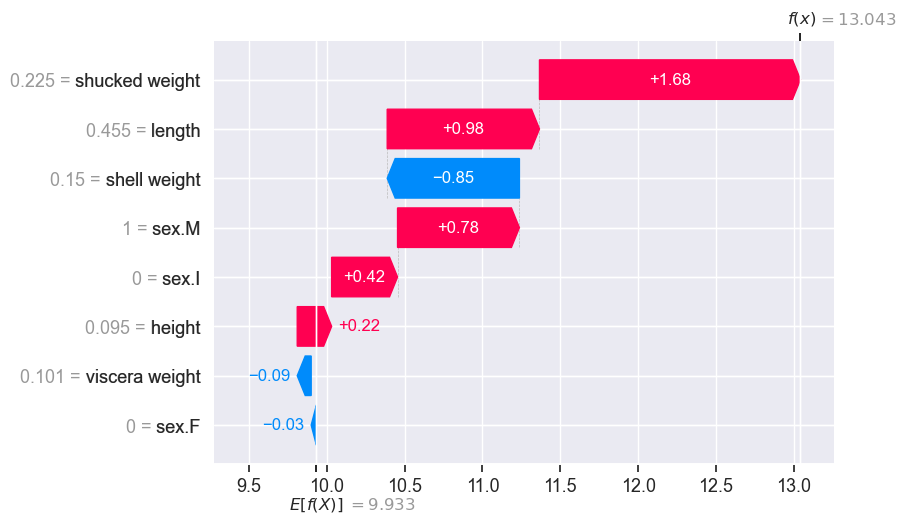

In [68]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [69]:
new_shap_values = []

# loop over all shap values:
for values in shap_values.values:
    # sum SHAP values for sex
    sv = list(values)
    sv = sv[0:5] + [sum(sv[5:8])]

    new_shap_values.append(sv)

In [70]:
# replace shap values
shap_values.values = np.array(new_shap_values)

# replace data with categorical feature values
X_cat = data[
    ["length", "height", "shucked weight", "viscera weight", "shell weight", "sex"]
]
shap_values.data = np.array(X_cat)

# update feature names
shap_values.feature_names = list(X_cat.columns)

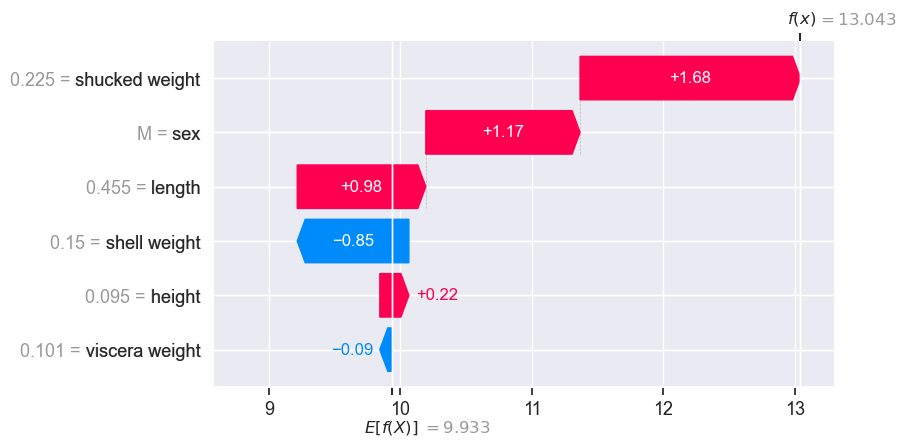

In [71]:
shap.plots.waterfall(shap_values[0])

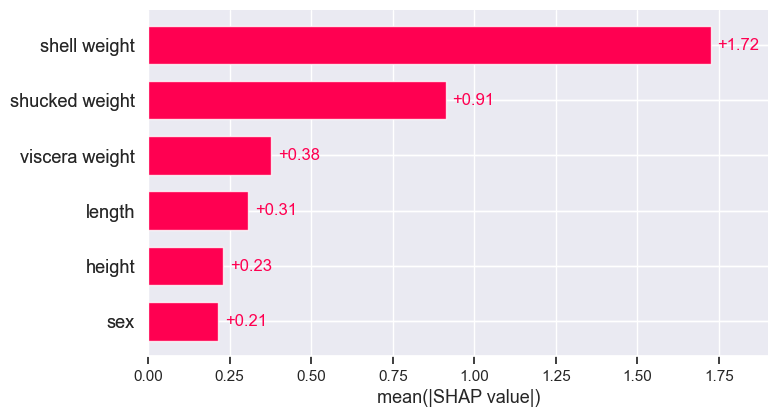

In [72]:
shap.plots.bar(shap_values)

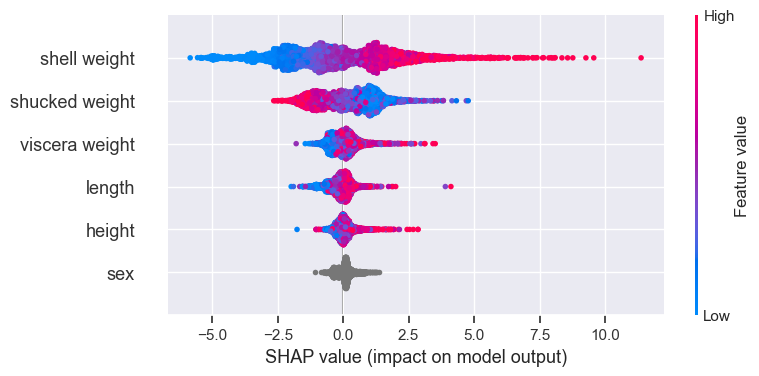

In [73]:
shap.plots.beeswarm(shap_values)

Text(0.5, 0, 'Sex')

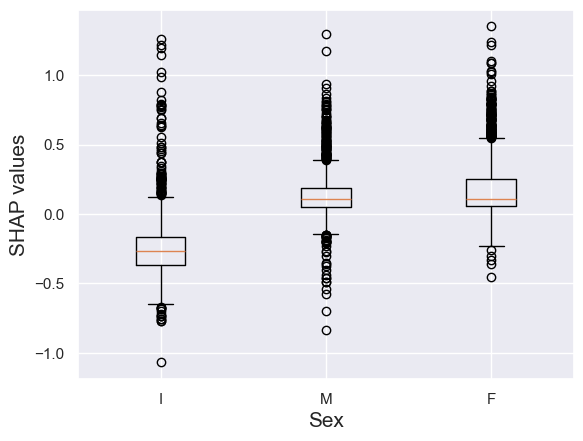

In [74]:
# get shaply values and data
sex_values = shap_values[:, "sex"].values
sex_data = shap_values[:, "sex"].data
sex_categories = ["I", "M", "F"]

# split sex shap values based on category
sex_groups = []
for s in sex_categories:
    relevant_values = sex_values[sex_data == s]
    sex_groups.append(relevant_values)

# plot boxplot
plt.boxplot(sex_groups, labels=sex_categories)

plt.ylabel("SHAP values", size=15)
plt.xlabel("Sex", size=15)

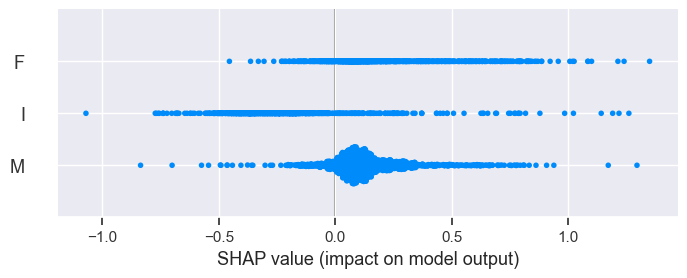

In [75]:
# create for placeholder SHAP values
shap_values_sex = explainer(X)

# get shaply values and data
sex_values = shap_values[:, "sex"].values
sex_data = shap_values[:, "sex"].data
sex_categories = ["I", "M", "F"]

# create new SHAP values array

# split odor SHAP values by unique odor categories
new_shap_values = [
    np.array(pd.Series(sex_values)[sex_data == s]) for s in sex_categories
]

# each sublist needs to be the same length
max_len = max([len(v) for v in new_shap_values])
new_shap_values = [
    np.append(vs, [np.nan] * (max_len - len(vs))) for vs in new_shap_values
]
new_shap_values = np.array(new_shap_values)

# transpost matrix so categories are columns and SHAP values are rows
new_shap_values = new_shap_values.transpose()

# replace shap values
shap_values_sex.values = np.array(new_shap_values)

# replace data with placeholder array
shap_values_sex.data = np.array([[0] * len(sex_categories)] * max_len)

# replace base data with placeholder array
shap_values_sex.base = np.array([0] * max_len)

# replace feature names with category labels
shap_values_sex.feature_names = list(sex_categories)

# use beeswarm as before
shap.plots.beeswarm(shap_values_sex, color_bar=False)